In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
data = pd.read_csv("./wbes_sintetico.csv")
cols = [
    "sales_annual_usd",
    "labor_productivity_usd_per_employee",
    "employees",
    "firm_age_years",
    "training",
    "access_finance",
    "exporter",
    "competition_level",
    "digital_payments",
]

completeData = data[cols]

dataNoNull = completeData.dropna().copy()

dataNoNull.shape
dataNoNull.head()

,sales_annual_usd,labor_productivity_usd_per_employee,employees,firm_age_years,training,access_finance,exporter,competition_level,digital_payments
0,42879.327130,5374.714150,13.0,10.0,1.0,1.0,0,Media,1
1,54570.897174,4728.282631,9.0,6.0,0.0,0.0,0,Baja,1
2,56311.260030,3104.627628,15.0,10.0,0.0,0.0,1,Baja,1
3,93419.359675,3129.017055,25.0,12.0,1.0,0.0,1,Baja,1
4,24608.889361,2824.645056,9.0,9.0,0.0,0.0,0,Baja,0


In [3]:
mean_sales = dataNoNull["sales_annual_usd"].mean()
dataNoNull["successful"] = (dataNoNull["sales_annual_usd"] > mean_sales).astype(int)
dataNoNull["successful"].value_counts()

X = dataNoNull[
    ["employees", "training", "exporter", "access_finance", "competition_level"]
]
X = pd.get_dummies(X, columns=["competition_level"], drop_first=True)
y = dataNoNull["successful"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.7333333333333333


In [5]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[104  18]
 [ 38  50]]


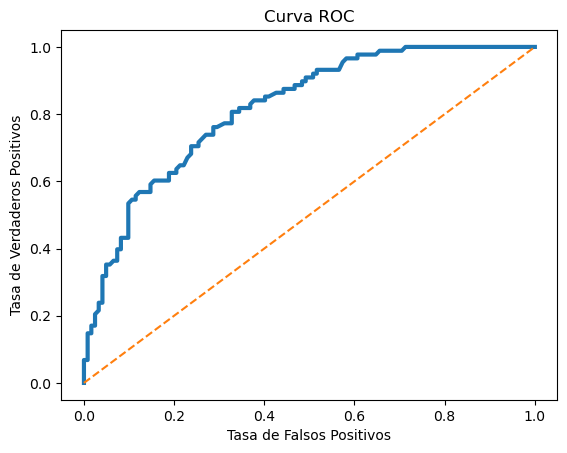

AUC: 0.8184146795827124


In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, linewidth=3)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.show()

print("AUC:", auc)

## Análisis y Discusión de Resultados

Con la finalidad de saber si una empresa puede clasificarse como “exitosa” basada en nuestra base de datos, cree una variable binaria **successful**, donde los 1 representarían a las empresas cuyos valores en ventas fuesen superiores al promedio, y en caso contrario serían 0. El modelo logístico se entrenó utilizando como variables predictoras **employees, training, exporter, access_finance y competition_level**.

El modelo obtuvo una **precisión de 73.3%**, indicandonos que clasifica correctamente aproximadamente 7 de cada 10 empresas. La matriz de confusión realizada nos muestra que identificó correctamente **104 empresas no exitosas** y **50 exitosas**, aunque presenta **18 falsos positivos** y **38 falsos negativos**. La curva ROC arrojó un **AUC de 0.818**, demostrandonos que tiene una buena capacidad de discriminación entre empresas exitosas y no exitosas, significativamente superior a una clasificación aleatoria.

Con base en los resultados, éstos nos sugieren que variables como **ser exportadora, ofrecer capacitación y contar con acceso a financiamiento** incrementan la probabilidad de éxito. En contraste, empresas que no exportan, no capacitan a su personal o no cuentan con acceso a financiamiento presentan una mayor probabilidad de no superar el promedio de ventas. Por lo tanto, sí es posible clasificar el éxito empresarial a partir de sus características estructurales y estratégicas, con un modelo que presenta una capacidad predictiva sólida.
